In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import LinearSVC
svm_lin = LinearSVC(C=0.3)
svm_lin.fit(X,y)

LinearSVC(C=0.3)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_probs = model.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
print('LogisticRegression: ROC AUC=%.5f' % (lr_auc))


LogisticRegression: ROC AUC=0.84787


In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
lr_probs = model.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_pr = average_precision_score(y_test, lr_probs)

In [ ]:
print('LogisticRegression: PR=%.5f' % (lr_pr))


LogisticRegression: PR=0.82938


In [ ]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve


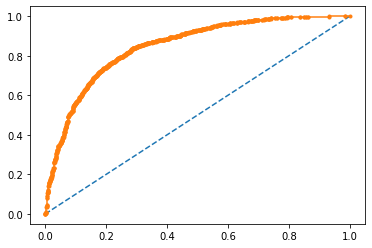

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

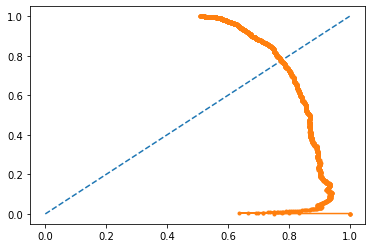

In [ ]:
fpr, tpr, thresholds = precision_recall_curve(y_test, lr_probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
lrl2 = LR(penalty="l2", solver="liblinear", C=0.5, max_iter=1000) #регуляр2


In [ ]:
lrl2 = lrl2.fit(X, y)

print(lrl2.coef_)
print((lrl2.coef_ != 0).sum(axis=1))


[[ 0.23468253  0.33939531  0.07649094  0.19129572  0.08545161 -0.08263583
  -0.05426057 -0.30746511 -0.26454876  0.04404188]]
[10]
